 ## CSC6621 - Final project - Team E-302
### Human activity recognition using Smartphones

The dataset includes the following files:
=========================================

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

In [75]:
### Import Statements

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\nbhatt\.cache\kagglehub\datasets\uciml\human-activity-recognition-with-smartphones\versions\2


In [77]:
df_train=pd.read_csv(path+'/train.csv')

In [78]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [79]:
from sklearn import preprocessing

In [80]:
encoder=preprocessing.LabelEncoder()

In [81]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [82]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [83]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

# Baseline Model #1 - SVM

In [85]:

# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [86]:
svc=SVC()
svc.fit(X_train,y_train)


SVC()

In [87]:
y_pred=svc.predict(X_test)

In [88]:
print("Accuracy of SVC classifier on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))

Accuracy of SVC classifier on test set: 0.97
[[291   0   0   0   0   0]
 [  1 218  26   0   0   1]
 [  0  19 262   0   0   0]
 [  0   0   0 242   0   1]
 [  0   0   0   1 206   0]
 [  0   0   0   1   1 201]]


### Calculated SVM accuracy = 97% 

# Baseline Model #2 - MLP for multi class - classification problem

Epoch 1/20


C:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6054 - loss: 0.9393 - val_accuracy: 0.8926 - val_loss: 0.2591
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.2734 - val_accuracy: 0.9307 - val_loss: 0.1721
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9246 - loss: 0.1915 - val_accuracy: 0.9443 - val_loss: 0.1414
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.1503 - val_accuracy: 0.9273 - val_loss: 0.1664
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1391 - val_accuracy: 0.9429 - val_loss: 0.1261
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.1128 - val_accuracy: 0.9388 - val_loss: 0.1401
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.1205 - val_accuracy: 0.9667 - val_loss: 0.0838
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1134 - val_accuracy: 0.9694 - val_

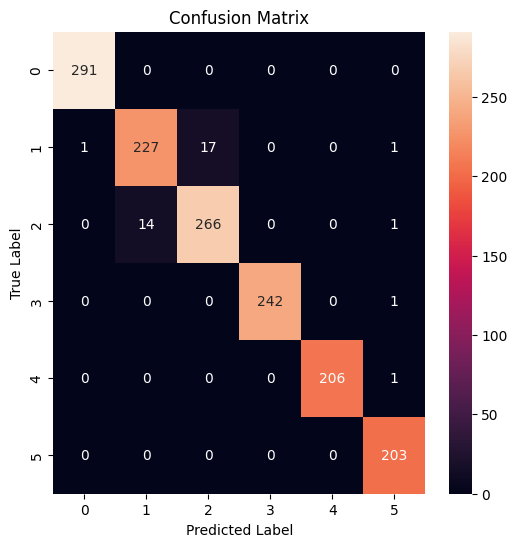

In [91]:
########################################################### Encoding labels ####################################################
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
########################################################### one-hot encoding ###############################################
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)
####################2-layer feedforward neural network (MLP) with ReLU activations and dropout regularization, #######################
###################### trained using categorical crossentropy loss for a multi-class classification task.########################################
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # helps reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

################################################## MODEL COMPILATION #########################################################
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # because we're using one-hot labels
              metrics=['accuracy'])

######################################################### TRAINING ##############################################################
history = model.fit(X_train, y_train_cat,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test_cat))

################################################# PERFORMANCE EVAL ################################################################
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

########################################### PRINTING CLASSIFICATION REPORT #########################################################
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test_encoded, y_pred_labels, target_names=[str(cls) for cls in encoder.classes_]))
############################################ PRINTING THE CONFUSION MATRIX ###################################################
conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

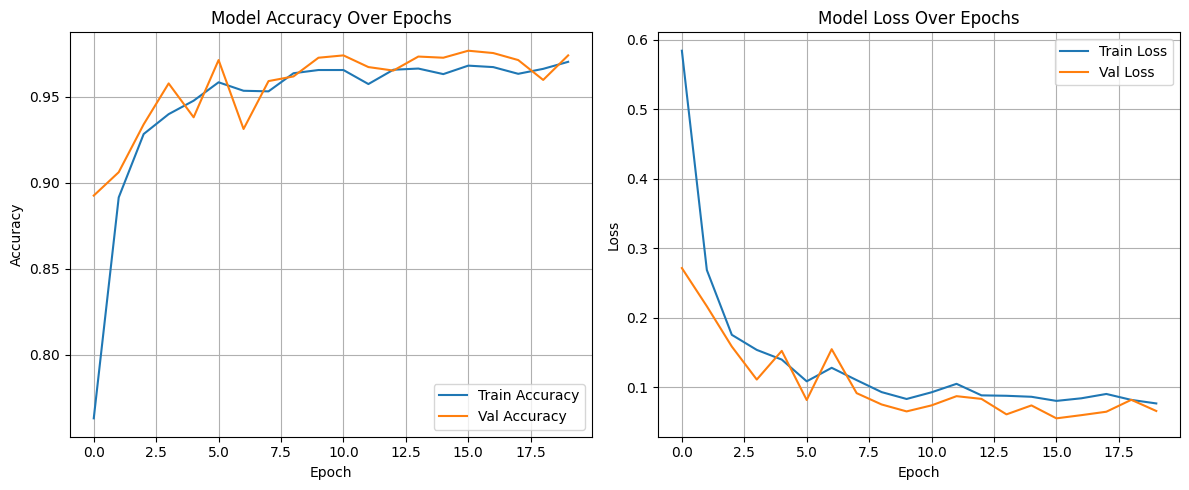

In [90]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##  Model #2 Accuracy (Plot on the left)
##### Training Accuracy steadily increases and plateaus around 97%.
##### Validation Accuracy follows a similar trend and ends very close to training accuracy (~97.5%)
### Conclusion 
##### High and consistent accuracy on both datasets suggests a well-tuned architecture for the classification problem.

## Model Loss (Plot on the right)
##### Training Loss decreases sharply and flattens, which is expected.
##### Validation Loss also drops and stabilizes similarly, no late-stage spikes.\
### Conclusion 
##### Low and decreasing loss on both training and validation sets further confirms that:
##### The model is learning effectively.
##### There's no sign of underfitting (where both losses remain high).
##### There's no overfitting (where val loss would increase while train loss drops).